In [6]:
import pandas as pd

df = pd.read_csv('./data/BTC_1m.csv')
df

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-02-20 00:00:00+00:00,7780113.0,7780113.0,7780113.0,7780113.0,0,0.0,0.0
1,2024-02-20 00:01:00+00:00,7780712.0,7780712.0,7780712.0,7780712.0,247201792,0.0,0.0
2,2024-02-20 00:02:00+00:00,7778306.0,7778306.0,7777378.0,7777378.0,0,0.0,0.0
3,2024-02-20 00:03:00+00:00,7780024.5,7780024.5,7780024.5,7780024.5,0,0.0,0.0
4,2024-02-20 00:04:00+00:00,7781959.5,7781959.5,7781959.5,7781959.5,383778816,0.0,0.0
...,...,...,...,...,...,...,...,...
11534,2024-02-29 07:24:00+00:00,9398987.0,9398987.0,9398987.0,9398987.0,0,0.0,0.0
11535,2024-02-29 07:25:00+00:00,9407546.0,9407546.0,9402754.0,9402754.0,1216348160,0.0,0.0
11536,2024-02-29 07:26:00+00:00,9400343.0,9400343.0,9400343.0,9400343.0,2543845376,0.0,0.0
11537,2024-02-29 07:27:00+00:00,9405284.0,9405284.0,9405284.0,9405284.0,7520387072,0.0,0.0


In [7]:
# 不要な列を削除
df = df.drop(columns=['Dividends', 'Stock Splits'])

# 'Datetime'列をdatetime型に変換
df['Datetime'] = pd.to_datetime(df['Datetime'])

# 15分後の終値を新しい列として追加
df['Close_in_15m'] = df['Close'].shift(-15)

# 最後の15行は15分後のデータが存在しないため削除
df = df.iloc[:-15]

df

,Datetime,Open,High,Low,Close,Volume,Close_in_15m
0,2024-02-20 00:00:00+00:00,7780113.0,7780113.0,7780113.0,7780113.0,0,7783024.5
1,2024-02-20 00:01:00+00:00,7780712.0,7780712.0,7780712.0,7780712.0,247201792,7776935.5
2,2024-02-20 00:02:00+00:00,7778306.0,7778306.0,7777378.0,7777378.0,0,7780851.5
3,2024-02-20 00:03:00+00:00,7780024.5,7780024.5,7780024.5,7780024.5,0,7782597.0
4,2024-02-20 00:04:00+00:00,7781959.5,7781959.5,7781959.5,7781959.5,383778816,7782540.5
...,...,...,...,...,...,...,...
11519,2024-02-29 07:07:00+00:00,9429606.0,9429606.0,9429606.0,9429606.0,6024069120,9398987.0
11520,2024-02-29 07:08:00+00:00,9426249.0,9426249.0,9426249.0,9426249.0,0,9402754.0
11521,2024-02-29 07:09:00+00:00,9431280.0,9431280.0,9431280.0,9431280.0,13157531648,9400343.0
11522,2024-02-29 07:10:00+00:00,9448526.0,9448526.0,9448526.0,9448526.0,3347054592,9405284.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 特徴量とターゲットを分離
X = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = df['Close_in_15m'].values

# データセットをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

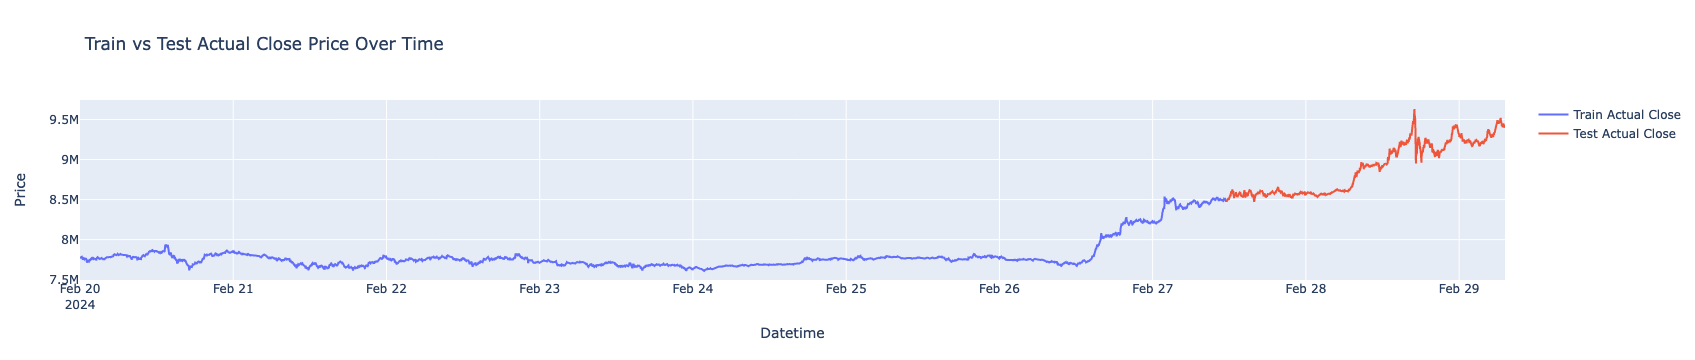

In [24]:
import plotly.graph_objects as go

# トレーニングデータセットとテストデータセットに対応する日付
train_dates = df['Datetime'][:len(y_train)]
test_dates = df['Datetime'][len(y_train):len(y_train) + len(y_test)]

# Plotlyでのグラフ作成
fig = go.Figure()

# トレーニングデータセットの実際の終値のプロット
fig.add_trace(go.Scatter(x=train_dates, y=y_train.flatten(), mode='lines', name='Train Actual Close'))

# テストデータセットの実際の終値のプロット
fig.add_trace(go.Scatter(x=test_dates, y=y_test.flatten(), mode='lines', name='Test Actual Close'))

# タイトルと軸のラベル設定
fig.update_layout(title='Train vs Test Actual Close Price Over Time', xaxis_title='Datetime', yaxis_title='Price')

# グラフの表示
fig.show()

In [ ]:
# 特徴量の正規化
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# ターゲットの正規化
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

In [14]:
import keras_tuner as kt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Embedding, Flatten
from tensorflow.keras.optimizers import Adam

# モデルを構築する関数
def build_model(hp):
    embed_dim = hp.Int('embed_dim', min_value=32, max_value=128, step=32)  # 埋め込みの次元
    num_heads = hp.Int('num_heads', min_value=2, max_value=8, step=2)  # 注意のヘッド数
    ff_dim = hp.Int('ff_dim', min_value=32, max_value=128, step=32)  # フィードフォワードネットワークの内部次元
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)  # ドロップアウト率
    
    inputs = Input(shape=(X_train_scaled.shape[1],))
    x = Embedding(input_dim=input_shape, output_dim=embed_dim)(inputs)
    x = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)(x)
    x = Flatten()(x)
    x = Dense(64, activation="relu")(x)
    outputs = Dense(1)(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    
    return model

# Keras Tunerを使ったハイパーパラメータの検索
tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

# ハイパーパラメータ検索の実行
tuner.search(X_train_scaled, y_train_scaled, epochs=10, validation_split=0.2)

# 最適なハイパーパラメータの取得
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('embed_dim')} and the optimal learning rate for the optimizer
is {best_hps.get('num_heads')}.
""")


Trial 8 Complete [00h 00m 07s]
val_loss: 0.18939517438411713

Best val_loss So Far: 0.18939517438411713
Total elapsed time: 00h 01m 19s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
32                |32                |embed_dim
6                 |6                 |num_heads
32                |32                |ff_dim
0                 |0.4               |dropout_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


KeyboardInterrupt: 

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.layers import MultiHeadAttention, Embedding, Flatten
from tensorflow.keras.optimizers import Adam

# Transformerブロックの定義
class TransformerBlock(Model):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = Sequential([Dense(ff_dim, activation="relu"), Dense(embed_dim),])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# モデルの構築
input_shape = X_train_scaled.shape[1]
embed_dim = 32  # 埋め込みの次元
num_heads = 2  # 注意のヘッド数
ff_dim = 32  # フィードフォワードネットワークの内部次元

inputs = Input(shape=(input_shape,))
x = Embedding(input_dim=input_shape, output_dim=embed_dim)(inputs)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = Flatten()(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)

# モデルのコンパイル
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# モデルのサマリー
model.summary()

# 学習の実行
history = model.fit(X_train_scaled, y_train_scaled, batch_size=32, epochs=10, validation_split=0.2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 embedding (Embedding)       (None, 5, 32)             160       
                                                                 
 transformer_block (Transfo  (None, 5, 32)             10656     
 rmerBlock)                                                      
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                10304     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                             

In [15]:
from tensorflow.keras.metrics import MeanAbsoluteError, MeanSquaredError
import numpy as np

# テストデータセットを使用して予測を生成
predictions_scaled = model.predict(X_test_scaled)

# 予測を元のスケールに戻す
predictions = scaler_y.inverse_transform(predictions_scaled)

# 実際の値を元のスケールに戻す
y_test_inverse = scaler_y.inverse_transform(y_test_scaled)

# 平均絶対誤差（MAE）の計算
mae = MeanAbsoluteError()
mae.update_state(y_test_inverse, predictions)
mae_result = mae.result().numpy()

# 平均二乗誤差（MSE）の計算
mse = MeanSquaredError()
mse.update_state(y_test_inverse, predictions)
mse_result = mse.result().numpy()

# 平方根平均二乗誤差（RMSE）の計算
rmse_result = np.sqrt(mse_result)

print(f"MAE: {mae_result}, MSE: {mse_result}, RMSE: {rmse_result}")


73/73 [==============================] - 0s 4ms/step
MAE: 1399162.0, MSE: 2069585461248.0, RMSE: 1438605.375


In [16]:
predictions

array([[7718489. ],
       [7718489. ],
       [7718489. ],
       ...,
       [7478856.5],
       [7478856.5],
       [7478856.5]], dtype=float32)

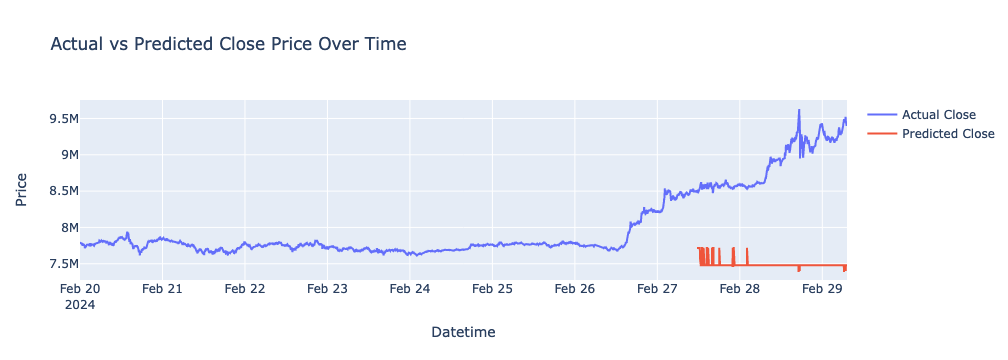

In [18]:
import plotly.graph_objects as go

# テストデータセットの日付データ（ここでは、テストデータセットのDatetimeカラムを使用すると仮定）
test_dates = df['Datetime'][-len(predictions):]  # テストデータセットに対応する日付

# Plotlyでのグラフ作成
fig = go.Figure()

# 実際の終値のプロット
fig.add_trace(go.Scatter(x=df['Datetime'], y=df["Close"], mode='lines', name='Actual Close'))

# 予測値のプロット
fig.add_trace(go.Scatter(x=test_dates, y=predictions.flatten(), mode='lines', name='Predicted Close'))

# タイトルと軸のラベル設定
fig.update_layout(title='Actual vs Predicted Close Price Over Time', xaxis_title='Datetime', yaxis_title='Price')

# グラフの表示
fig.show()